# Assignment 4 - Logistic Classifiers

In [2]:
import turicreate as tc
import re
import matplotlib.pyplot as plt

## Question 2: 

### a.) Imagine a movie production company wants to use a sentiment analysis model to identify positive/negative reviews of their movies. Which is worse for this use case, a false positive or a false negative, or are they equally bad? What value of ${\beta}$ would be suitable for an $F_{\beta}$ score?

Both false positives and false negatives can be bad.
<br>**False positive**: the review is negative but the model identifies the review as having a positive sentiment. It is bad because the movie production company may falsely believe a movie is well-received and react on it. They may invest more money in marketing this movie and producing more similar but unpopular movies which will result in financial losses of the company.
<br>**False negative**: the review is positive but the model identifies the review as having a negative sentiment. It is equally bad because the company may underestimate the value of the movie and miss the chance for marketing as well as for producing a similar kind of blockbuster to increase the revenue.
<br>In a case that considers recall and precision equally, then ${\beta}=1$.

### b.) Clean the data so that it is better suited for sentiment analysis, according to your ideas in problem 2h. Add a markdown cell to explain what you are doing. Choose one of two ways to prepare the data:

### *Explanation:* 
For the cleaning process, we begin by placing the data into an Sframe. Using the file 'stop_words_english' to upload a list of all stop words that ideally would give a weight of 0 in the model. 
We define a function that will remove all the stop words and html script from a single review, this drastically reduces the total number of features the model is using. 
We can now define the new Sframe as the old one after the cleaning function removes the stop words for each review.

**Steps:**

1.The main function we use here is re.sub(), it will find and replace the matches with empty strings.

2.To remove html tags: we use pattern '<.{1,4}>' to find all html tags and replace them with empty strings.

3.To remove punctuation, we use the pattern '[^\w^\s\n]' to find all non words, non white space and new line and replace them with a space.

4.To remove numbers, we use the patter '\d' to replace a match where the string contains digits (numbers from 0-9) with an empty string.

5.Since Python treats upper case and lower case differently, we use lower() to change all upper cases to lower cases and we convert the word case before deleting unnecessary words so we don’t need to worry about the case differences.

6.Words with only one or two characters usually don’t convey meaningful sentiments, so we use '\\b\w{1,2}\\b' to replace a word (\b word \b) where there are only one or two characters (w{1,2}) with an empty string.

7.We use for loop to loop through stop words to clean all stop words in the texts.

Load the original dataset into a dataframe and use the regex Python library to
clean the text data.

In [3]:
# calling the csv data into an SFrame called movies. 
movies = tc.SFrame('IMDB_Dataset.csv')
movies

Finished parsing file /home/xwang111/SupervisedML/Assignment4/IMDB_Dataset.csv

Parsing completed. Parsed 100 lines in 0.48153 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 39624 lines. Lines per second: 51160.6

Finished parsing file /home/xwang111/SupervisedML/Assignment4/IMDB_Dataset.csv

Parsing completed. Parsed 50000 lines in 0.920811 secs.

review,sentiment
One of the otherreviewers has mentioned ...,positive
A wonderful littleproduction. <br /><br ...,positive
I thought this was awonderful way to spend ...,positive
Basically there's afamily where a little ...,negative
"Petter Mattei's ""Love inthe Time of Money"" is a ...",positive
"Probably my all-timefavorite movie, a story ...",positive
I sure would like to seea resurrection of a up ...,positive
"This show was an amazing,fresh & innovative idea ...",negative
Encouraged by thepositive comments about ...,negative
If you like original gutwrenching laughter you ...,positive


In [4]:
# create a stopwords array
stopwords = tc.SArray('stop_words_english.txt')
stopwords

Finished parsing file /home/xwang111/SupervisedML/Assignment4/stop_words_english.txt

Parsing completed. Parsed 851 lines in 0.031889 secs.

dtype: str
Rows: 851
['able', 'about', 'above', 'abroad', 'according', 'accordingly', 'across', 'actually', 'adj', 'after', 'afterwards', 'again', 'against', 'ago', 'ahead', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'alongside', 'already', 'also', 'although', 'always', 'am', 'amid', 'amidst', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', "a's", 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'back', 'backward', 'backwards', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'came', 'can', 'cannot', 'cant', "can't", 'caption', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', "c'mon", ..

In [5]:
# This function cleans a single review.
def clean_text(sample):
    # remove html tags
    sample = re.sub('<.{1,4}>', '', sample)
    
    # remove punctuation 
    sample = re.sub('[^\w^\s\n]', ' ', sample)
    
    # remove numbers
    sample = re.sub('\d', '', sample)
    
    # make everything lowercase
    sample = sample.lower()
    
    # remove words with one to two characters
    sample = re.sub('\\b\w{1,2}\\b', '', sample)
    
    #remove stopwords
    for word in stopwords:
        sample = re.sub('\\b' + word + '\\b', '', sample)
        
    #return clean text
    return sample

In [6]:
# apply the clean_text() function to each row of the SFrame and add a 'cleaned' column to the data frame
# note this is much faster than looping through row-by-row
movies['cleaned'] = movies.apply(lambda x: clean_text(x['review']))
# pick a row to check the cleaned text
movies['cleaned'][1000]

Using default 16 lambda workers.

To maximize the degree of parallelism, add the following code to the beginning of the program:

"turicreate.config.set_runtime_config('TURI_DEFAULT_NUM_PYLAMBDA_WORKERS', 24)"

Note that increasing the degree of parallelism also increases the memory footprint.

' movie  awful       bothered  write  review   garbage            boring films       acting   bad   boy  plays  main character  annoys        expression   face    movie      slap   basically     movie  slow motion shots  skateboarders  weird music   utter         write    lines  text  submit  comment          lines    lead character      faces     slap meh      movie sucks     '

### c.) Load the cleaned data and labels into an SFrame. Add a column named ‘words’ to the SFrame that stores the count of each word used in each review. Print the SFrame.

In [7]:
# counting words and adding a new 'words' column to record word-count dictionary
movies['words'] = tc.text_analytics.count_words(movies['cleaned'])
movies

review,sentiment,cleaned,words
One of the otherreviewers has mentioned ...,positive,reviewers mentionedwatching episode ...,"{'darker': 1.0, 'touch':1.0, 'viewing': 1.0, ..."
A wonderful littleproduction. <br /><br ...,positive,wonderful productionfilming technique ...,"{'terribly': 1.0,'surface': 1.0, ..."
I thought this was awonderful way to spend ...,positive,thought wonderfulspend time hot summer ...,"{'superman': 1.0,'interesting': 1.0, ..."
Basically there's afamily where a little ...,negative,basically familyboy jake thinks ...,"{'dialogs': 1.0,'playing': 1.0, 'spots': ..."
"Petter Mattei's ""Love inthe Time of Money"" is a ...",positive,petter mattei lovetime money visually ...,"{'luck': 1.0, 'alive':1.0, 'rest': 1.0, ..."
"Probably my all-timefavorite movie, a story ...",positive,time favorite moviestory selflessness ...,"{'thumbs': 1.0,'startling': 1.0, 'ro ..."
I sure would like to seea resurrection of a up ...,positive,resurrectiondated seahunt series ...,"{'quit': 1.0, 'rhymes':1.0, 'points': 1.0, ..."
"This show was an amazing,fresh & innovative idea ...",negative,amazing freshinnovative idea ...,"{'awful': 1.0,'disgraceful': 1.0, ..."
Encouraged by thepositive comments about ...,negative,encouraged positivecomments film ...,"{'effort': 1.0, 'keitel':2.0, 'making': 1.0, ..."
If you like original gutwrenching laughter you ...,positive,original gut wrenchinglaughter movie ...,"{'mom': 1.0, 'hell': 1.0,'love': 1.0, 'young': ..."


### d.) Split the data into training/validation/testing sets using 80%/10%/10% respectively

In [8]:
# split the dataset into training set and another set for validation and testing
# training (80%) / total (100%) = 0.8
training, validation_testing = movies.random_split(.8, seed=0, exact=True)

In [9]:
# check the length of training set
print("Length of training set:", len(training))

Length of training set: 40000


In [10]:
# equally split the validation and testing set into validation and testing
# validation (10%) / validation_test (20%) = 0.5
validation, testing = validation_testing.random_split(.5, seed=0, exact=True)

In [11]:
# check the length of validation set
print("Length of validation set:", len(validation))

# check the length of testing set
print("Length of testing set:", len(testing))

Length of validation set: 5000
Length of testing set: 5000


### e.) Use Turicreate to create logistic classifiers for sentiment analysis. Be sure to use your validation set in the training. Experiment with different values of hyperparameters to develop two different models

Hyperparameters for Model 1:<br>1. l1 penalty=0.01<br>2. l2 penalty=0.0<br>3. feature rescaling=False<br>4. convergence threshold=0.01<br>5. solver='auto'<br>6. max_iterations=100

In [12]:
# Define our first model perceptron 1 using hyperparameters: L1 = 0.01, L2 = 0.0, Feature rescaling: False, Max iterations:100. 
model_1 = tc.logistic_classifier.create(training, target='sentiment', features=['words']
                                             , l1_penalty=0.01, l2_penalty=0.0
                                             , feature_rescaling=False, validation_set=validation
                                             , convergence_threshold=0.01
                                             , solver='auto', seed=0, max_iterations=100)

Logistic regression:

--------------------------------------------------------

Number of examples          : 40000

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 92420

Number of coefficients      : 92421

Starting Accelerated Gradient (FISTA)

--------------------------------------------------------

Tuning step size. First iteration could take longer than subsequent iterations.

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 1        | 1.000000  | 1.055626     | 0.498125          | 0.503800            |

| 1         | 2        | 0.000040  | 2.211297     | 0.672875          | 0.667800            |

| 2         | 3        | 0.000012  | 2.443571     | 0.718150          | 0.720400            |

| 3         | 4        | 0.000008  | 2.595644     | 0.755225          | 0.753200            |

| 4         | 5        | 0.000008  | 2.713555     | 0.774975          | 0.774200            |

| 5         | 6        | 0.000008  | 2.828489     | 0.787125          | 0.783800            |

| 10        | 11       | 0.000008  | 3.384799     | 0.812500          | 0.805600            |

| 20        | 21       | 0.000008  | 4.531046     | 0.841000          | 0.827000            |

| 30        | 31       | 0.000008  | 5.700775     | 0.860225          | 0.843400            |

| 40        | 41       | 0.000008  | 6.849569     | 0.875400          | 0.859000            |

| 50        | 51       | 0.000008  | 7.997745     | 0.886325          | 0.868600            |

| 60        | 61       | 0.000008  | 9.149196     | 0.893000          | 0.874200            |

| 70        | 71       | 0.000008  | 10.325446    | 0.899100          | 0.877000            |

| 80        | 81       | 0.000008  | 11.468657    | 0.904250          | 0.879400            |

| 90        | 91       | 0.000008  | 12.617625    | 0.908700          | 0.880800            |

| 96        | 97       | 0.000008  | 13.300582    | 0.911825          | 0.883400            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

Hyperparameters for Model 2:<br>1. l1 penalty=0.0<br>2. l2 penalty=0.0<br>3. feature rescaling=True<br>4. convergence threshold=0.01<br>5. solver='auto'<br>6. max_iterations=10(by default)

In [13]:
# Define our second model perceptron 2 using hyperparameters: L1 = 0.0, L2 = 0.0, Feature rescaling: True.
model_2 = tc.logistic_classifier.create(training, target='sentiment', features=['words']
                                             , l1_penalty=0.0, l2_penalty=0.0
                                             , feature_rescaling=True, validation_set=validation
                                             , convergence_threshold=0.01
                                             , solver='auto', seed=0)

Logistic regression:

--------------------------------------------------------

Number of examples          : 40000

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 92420

Number of coefficients      : 92421

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.084214     | 0.931975          | 0.850200            |

| 1         | 4        | 1.000000  | 0.180147     | 0.959900          | 0.863800            |

| 2         | 5        | 1.000000  | 0.249523     | 0.982375          | 0.877600            |

| 3         | 6        | 1.000000  | 0.316483     | 0.985825          | 0.879800            |

| 4         | 7        | 1.000000  | 0.385439     | 0.993475          | 0.876800            |

| 9         | 12       | 1.000000  | 0.714979     | 0.999800          | 0.847800            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

### f.) For each model:
### i) find predictions using the testing set;

In [14]:
# Define predictions for first model using the testing set. 
prediction_1 = model_1.predict(testing)

# Define predictions for second model using the testing set.
prediction_2 = model_2.predict(testing)

# Create a dictionary to view the predicitons from the testing set.
prediction_dict = {'Prediction1':prediction_1, 'Prediction2':prediction_2, 'Label':testing['sentiment']}

# Turning the dictionary into a data frame. 
sf = tc.SFrame(prediction_dict)

# Showing the predicitons of both models relative the labels. 
sf

Label,Prediction1,Prediction2
negative,negative,negative
positive,positive,positive
positive,positive,positive
positive,positive,positive
positive,negative,positive
negative,positive,negative
positive,positive,negative
negative,negative,negative
negative,negative,negative
positive,negative,negative


### ii) display the training/validation/testing accuracy; 

In [15]:
# Showing the accuracy in training, testing, validation. 
# Model 1: 
print('Training set of Model 1 accuracy:', model_1.evaluate(training)['accuracy'])
print('Testing set of Model 1 accuracy:', model_1.evaluate(testing)['accuracy'])
print('Validation set of Model 1 accuracy:', model_1.evaluate(validation)['accuracy'], "\n")

# Model 2: 
print('Training set of of Model 2 accuracy:', model_2.evaluate(training)['accuracy'])
print('Testing set of Model 2 accuracy:', model_2.evaluate(testing)['accuracy'])
print('Validation set of Model 2 accuracy:', model_2.evaluate(validation)['accuracy'])

Training set of Model 1 accuracy: 0.911825
Testing set of Model 1 accuracy: 0.8846
Validation set of Model 1 accuracy: 0.8834 

Training set of of Model 2 accuracy: 0.9998
Testing set of Model 2 accuracy: 0.8482
Validation set of Model 2 accuracy: 0.8478


### iii) display the confusion matrix on the testing set;  

In [16]:
# Showing confusion matrix to find the count of correct and incorrect gueses. 
# Model 1. 
cm_1 = tc.evaluation.confusion_matrix(testing['sentiment'], prediction_1)

# Show the matrix.
cm_1

target_label,predicted_label,count
negative,negative,2120
positive,positive,2303
positive,negative,253
negative,positive,324


In [17]:
# Showing confusion matrix for model 2.
cm_2 = tc.evaluation.confusion_matrix(testing['sentiment'], prediction_2)

# Show the matrix. 
cm_2

target_label,predicted_label,count
negative,negative,2045
positive,positive,2196
positive,negative,360
negative,positive,399


In [18]:
# Creating a dictionary for model 1 and its positive/negative.
datadict_1 = {'Model 1': ['Positive','Negative'], 'Predict Positive':[cm_1['count'][1],cm_1['count'][3]], 'Predict Negative':[cm_1['count'][2],cm_1['count'][0]]}

# Turning it into a data frame. 
dt_1 = tc.SFrame(datadict_1)

# Showing the data frame. 
dt_1

Model 1,Predict Negative,Predict Positive
Positive,253,2303
Negative,2120,324


In [19]:
# Creating a dictionary for model 2 and its positive/negative. 
datadict_2 = {'Model 2': ['Positive','Negative'], 'Predict Positive':[cm_2['count'][1],cm_2['count'][3]], 'Predict Negative':[cm_2['count'][2],cm_2['count'][0]]}

# Turning it into a data frame. 
dt_2 = tc.SFrame(datadict_2)

# Showing the data framne. 
dt_2

Model 2,Predict Negative,Predict Positive
Positive,360,2196
Negative,2045,399


### iv) calculate recall, precision, sensitivity and specificity on the testing set;  

**Model 1  ;  Model 2** <br>
$TP = 2303 ; \quad TP = 2196$

$FP = 324 ; \quad FP = 399$

$TN = 2120 ; \quad TN = 2045$

$FN = 253 ; \quad FN = 360$

**Model 1:**

In [20]:
# Print the recall score for model 1
print('Recall = Sensitivity:', tc.evaluation.recall(testing['sentiment'], prediction_1))
# Print the precision score for model 1
print('Precision:', tc.evaluation.precision(testing['sentiment'], prediction_1))

Recall = Sensitivity: 0.901017214397496
Precision: 0.8766653977921584


*Specificity* = $\frac{TN}{TN+FP} = \frac{2120}{2120+324} = 86.74\%$

**Model 2:**

In [21]:
# Prints the recall score for model 2
print('Recall = Sensitivity:', tc.evaluation.recall(testing['sentiment'], prediction_2))
# Print the precision score for model 1
print('Precision:', tc.evaluation.precision(testing['sentiment'], prediction_2))

Recall = Sensitivity: 0.8591549295774648
Precision: 0.846242774566474


*Specificity* = $\frac{TN}{TN+FP} = \frac{2045}{2045+399} = 83.67\%$

### v) calculate the $F_{\beta}$ score on the testing set using the value of ${\beta}$ you choose above.

**The $F_{\beta}$ formula.**<br> 
Where, precision = $P$, recall = $R$ <br>
$P, R>=0, {\beta}>0$ <br><br>
$F_{\beta}(P, R) = \frac{(1+\beta^2)PR}{\beta^2P+R}$ <br> 
If we consider recall and precision equally, we need ${\beta}=1$.

In [22]:
# Prints the f (beta=1) score for model 1 on testing set
print('Model 1: F1 =', tc.evaluation.fbeta_score(testing['sentiment'], prediction_1, beta=1.0))

Model 1: F1 = 0.8886745128304071


In [23]:
# Prints the f (beta=1) score for model 2 on testing set
print('Model 2: F1 =', tc.evaluation.fbeta_score(testing['sentiment'], prediction_2, beta=1.0))

Model 2: F1 = 0.8526499708794409


### vi) using the testing set, calculate points for and plot the ROC curve (use turicreate.evaluation.roc_curve() and then matplotlib.pyplot());

In [24]:
# Generating the predictions (probability) for the testing data using model 1
# Predictions are stored in a new column called predictions1
testing['predictions1'] = model_1.predict(testing, output_type='probability')

# Generating the predictions (probability) for the testing data using model 2
# Predictions are stored in a new column called predictions2
testing['predictions2'] = model_2.predict(testing, output_type='probability')
testing

review,sentiment,cleaned,words
"Kind of drawn in by theerotic scenes, only to ...",negative,kind drawn eroticscenes realize ...,"{'starving': 1.0,'spent': 1.0, 'money': ..."
'War movie' is aHollywood genre that has ...,positive,war movie hollywoodgenre redone t ...,"{'altogether': 1.0,'repercussions': 1.0, ..."
One of the mostsignificant quotes from ...,positive,quotes entire filmpronounced halfway ...,"{'loss': 1.0, 'style':1.0, 'bella': 1.0, ..."
"This movie is based onthe book, ""A Many ...",positive,movie based booksplendored han suyin ...,"{'hollywood': 1.0,'enjoy': 1.0, 'jerker': ..."
"As a disclaimer, I'veseen the movie 5-6 times ...",positive,disclaimer movietimes years ...,"{'enjoyable': 1.0,'impeccable': 1.0, ..."
"How this film could beclassified as Drama, I ...",negative,film classifieddrama idea john ...,"{'taste': 1.0,'offended': 1.0, 'fact': ..."
Preston Sturgis' THEPOWER AND THE GLORY was ...,positive,preston sturgis powerglory unseen public ...,"{'depression': 1.0,'social': 1.0, 'reali ..."
The 33 percent of thenations nitwits that ...,negative,percent nationsnitwits support bush ...,"{'guillotine': 1.0,'jaw': 1.0, 'ends': 1.0, ..."
"Busty beauty StacieRandall plays PVC clad, ...",negative,busty beauty stacierandall plays pvc clad ...,"{'quotient': 1.0, 'high':1.0, 'earlier': 1.0, ..."
I thought that Mukhsinhas been wonderfully ...,positive,thought mukhsinwonderfully written ...,"{'exceeded': 1.0,'reached': 1.0, 'isn': ..."


In [25]:
# calling the ROC curve method from the evaluation module ,for model1
roc_curve_1 = tc.evaluation.roc_curve(testing['sentiment'],testing['predictions1'])
roc_curve_1

threshold,fpr,tpr,p,n
0.0,1.0,1.0,2556,2444
0.001,0.9063011456628478,1.0,2556,2444
0.002,0.8768412438625205,1.0,2556,2444
0.003,0.8531096563011457,0.9996087636932708,2556,2444
0.004,0.8351063829787234,0.9996087636932708,2556,2444
0.005,0.8211947626841244,0.9996087636932708,2556,2444
0.006,0.8072831423895254,0.9992175273865415,2556,2444
0.007,0.794189852700491,0.9988262910798122,2556,2444
0.008,0.7794599018003273,0.9984350547730829,2556,2444
0.009,0.7696399345335515,0.9984350547730829,2556,2444


In [26]:
# calling the ROC curve method from the evaluation module ,for model2
roc_curve_2 = tc.evaluation.roc_curve(testing['sentiment'],testing['predictions2'])
roc_curve_2

threshold,fpr,tpr,p,n
0.0,1.0,1.0,2556,2444
0.001,0.5085924713584288,0.9737871674491393,2556,2444
0.002,0.47381342062193127,0.9698748043818466,2556,2444
0.003,0.4525368248772504,0.9671361502347418,2556,2444
0.004,0.43780687397708673,0.9640062597809077,2556,2444
0.005,0.4230769230769231,0.9624413145539906,2556,2444
0.006,0.41080196399345337,0.9620500782472613,2556,2444
0.007,0.40220949263502453,0.9604851330203443,2556,2444
0.008,0.395253682487725,0.9589201877934272,2556,2444
0.009,0.3882978723404255,0.9581377151799687,2556,2444


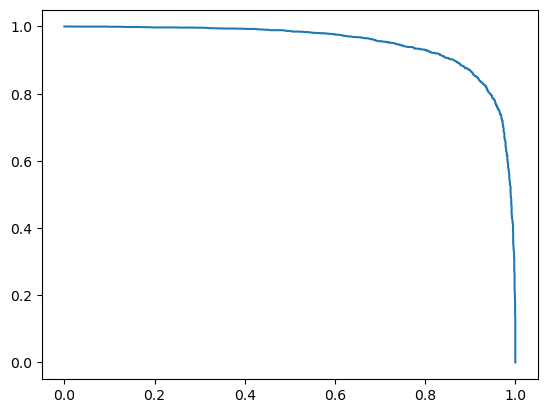

In [27]:
# Plotting a line plot for roc_curve 1 using Matplotlib
plt.plot(roc_curve_1['tpr'], 1-roc_curve_1['fpr'])

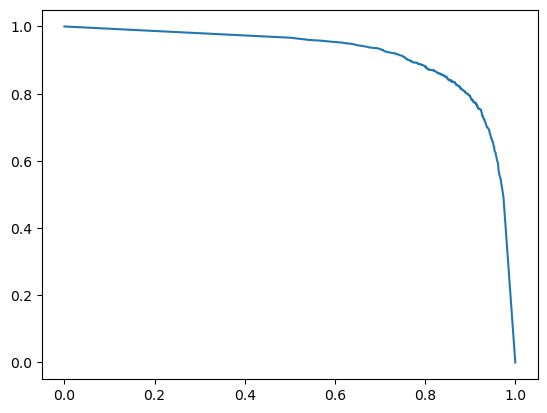

In [28]:
# Plotting a line plot for roc_curve 2 using Matplotlib
plt.plot(roc_curve_2['tpr'], 1-roc_curve_2['fpr'])

### vii) calculate the AUC for the testing set

In [31]:
# Calculating the Area Under the Curve, to measure the performance of the model
auc_1 = tc.evaluation.auc(testing['sentiment'], testing['predictions1'])
print('the AUC for the testing set of Model 1:', auc_1)

the AUC for the testing set of Model 1: 0.9506236249100342


In [33]:
# Calculating the Area Under the Curve, to measure the performance of the model
auc_2 = tc.evaluation.auc(testing['sentiment'], testing['predictions2'])
print('the AUC for the testing set of Model 2:', auc_2)

the AUC for the testing set of Model 2: 0.905670829395358


### g.) Select which of your two models is the best (or declare a tie) and justify your choice.

### Model 1: 
**Hyperparameter:** We set L2 penalty to 0 and shut down the feature rescaling parameter, choose l1_penalty=0.01, increase the iterations to 100.
<br>**Result(testing set):**
<br>Recall=Sensitivity=0.901 <br>Accuracy=0.8846<br>Precision=0.8767<br>Specificity=0.8674<br>F=0.8887<br>AUC=0.9506
<br>
### Model 2:
**Hyperparameter:** We shut down l1_penalty, l2_penalty, allow feature rescaling parameter to do its work, iteration set to default.
<br>**Result(testing set):** 
<br>Recall=Sensitivity=0.8592 <br>Accuracy= 0.8482 <br>Precision=0.8462 <br>Specificity=0.8367 <br>F=0.8526 <br>AUC=0.9057

It is clear that the **Model 1** is better overall for our use case.

First, Model 1 achieved a much better performance in terms of accuracy in training, validation, and testing set.

Additionally, based on our use case, we would like our sentiment analysis model to identify positive and negative reviews equally good which means we need to build a model that values recall and precision equally. Model 1 shows a good balance on recall and precision by achieving a higher F1 score than model 2. 

We also need our model to achieve a good performance on sensitivity and specificity. The sensitivity is the proportion of positive reviews the model correctly classified among all the positive reviews. The specificity is the proportion of negative reviews the model correctly classified among all the negative reviews.
We know that in the ROC curve plot, the horizontal coordinate corresponds to the sensitivity and the vertical coordinate to the specificity. We notice that Model 1 has a sharper edge than Model 2 in the ROC curve plots above which means Model 1 is more effective to distinguish between positive and negative reviews. This can further be proved by a higher AUC value Model 1 achieved than Model 2.

As for the reason behind the difference in performance of the two models, we believe that by using L1 penalty, Model 1 could adjust the weights of some irrelevant words to zero and focus on more meaningful words which improves the model in general.